**ЛАБОРАТОРНАЯ РАБОТА 5. ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ**

**В качестве наборов ресурсов, я использую Real estate valuation data set.xlsx**

**Описание набора**

**Оценка недвижимости - это регрессионная задача. Набор рыночных исторических данных для оценки недвижимости собран в районе Синдиан, Нью-Тайбэй, Тайвань. Набор данных был случайным образом разделён на обучающую выборку (2/3 образцов) и тестовую выборку (1/3 образцов).**

**Переменные таблицы:**

**Ввод данных осуществляется следующим образом**

 **No - ID**
 
 **X1 transaction date - Дата транзакции X1 = дата сделки (например, 2013.250=март 2013, 2013.500=июнь 2013 и т. д.)**
 
 **X2 house age - Возраст дома X2 = возраст дома (единица измерения: год)**
 
 **X3 distance to the nearest MRT station - Расстояние в 3 раза до ближайшей станции метро = расстояние до ближайшей станции метро (единица измерения: метр)**

 **X4 number of convenience stores - Количество круглосуточных магазинов X4 = количество магазинов шаговой доступности в радиусе пешей доступности (целое число)**
 
 **X5 latitude - X5 latitude = географическая координата, широта. (единица измерения: градус)**
 
 **X6 longitude - X6 долгота =географическая координата, долгота. (единица измерения: градус)**
 
 **Результат выглядит следующим образом**
 
 **Y house price of unit area - Y = цена за квадратный метр жилья (10000 новых тайваньских долларов/пин, где пин — местная единица измерения, 1 пин = 3,3 квадратного метра)**



**Для выполнения 5 лабораторной работы необходимо:**

Выполните построение модели логистической регрессии. В ходе 
решения задачи необходимо решить следующие подзадачи:

2.1 В рамках выполнения задания необходимо ввести 2 новых 
синтезированных признака, оценить изменение точности модели после 
добавления признаков (с применением масштабирования признаков и без).

2.2 После определения необходимого набора признаков необходимо 
сформировать набор значений гипперпараметра модели и выбрать 
оптимальное значение. Постройте график (AUC-ROC, гипперпараметр C).

2.3 После обучения модели необходимо сохранить на диск значения 
бейслайн.

AUC-ROC без масштабирования: 0.911
AUC-ROC с масштабированием: 0.909


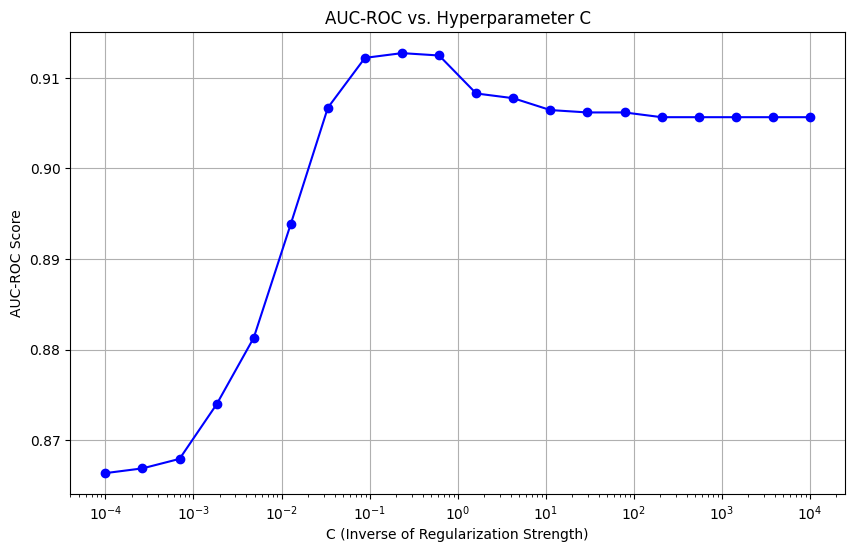

Оптимальное значение C: 0.23357214690901212
Модель сохранена в: logistic_regression_baseline.pkl


In [14]:
# Импорт необходимых библиотек
import pandas as pd  # Для работы с таблицами данных (DataFrame)
import numpy as np  # Для математических операций и работы с массивами
from sklearn.model_selection import train_test_split  # Для разделения данных на обучающую и тестовую выборки
from sklearn.preprocessing import StandardScaler  # Для нормализации признаков (масштабирования)
from sklearn.linear_model import LogisticRegression  # Для построения модели логистической регрессии
from sklearn.metrics import roc_auc_score, roc_curve  # Для оценки качества модели (метрики AUC-ROC)
import matplotlib.pyplot as plt  # Для построения графиков
import joblib  # Для сохранения модели на диск

#Загрузка данных
file_path = 'Real estate valuation data set.xlsx' 
data = pd.read_excel(file_path)  # Чтение данных из Excel-файла в объект DataFrame

#Преобразование целевого признака в бинарный
median_price = data['Y house price of unit area'].median()  # Вычисляем медианное значение цены недвижимости
# Создаем новый столбец 'Target', где 1 - цена выше медианы, 0 - цена ниже или равна медиане
data['Target'] = (data['Y house price of unit area'] > median_price).astype(int)

#Синтезирование новых признаков
# Новый признак 'Feature1': отношение возраста дома к расстоянию до ближайшей станции MRT
data['Feature1'] = data['X2 house age'] / (data['X3 distance to the nearest MRT station'] + 1e-5)
# Новый признак 'Feature2': произведение количества магазинов и широты
data['Feature2'] = data['X4 number of convenience stores'] * data['X5 latitude']

#Разделение данных на признаки (X) и целевой столбец (y)
X = data[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores',
          'X5 latitude', 'X6 longitude', 'Feature1', 'Feature2']]  # Матрица признаков
y = data['Target']  # Целевой столбец (бинарный)

#Разделение данных на обучающую и тестовую выборки
# 70% данных используется для обучения, 30% для тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Масштабирование признаков (нормализация)
scaler = StandardScaler()  # Создаем объект масштабировщика
X_train_scaled = scaler.fit_transform(X_train)  # Подгоняем масштабировщик на обучающих данных и трансформируем их
X_test_scaled = scaler.transform(X_test)  # Применяем масштабирование к тестовым данным

#Построение логистической регрессии без масштабирования
model = LogisticRegression(random_state=42)  # Создаем объект модели логистической регрессии
model.fit(X_train, y_train)  # Обучаем модель на немасштабированных данных
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Получаем вероятности принадлежности к классу 1

#Оценка качества модели без масштабирования
auc_score_no_scaling = roc_auc_score(y_test, y_pred_proba)  # Вычисляем метрику AUC-ROC
print(f"AUC-ROC без масштабирования: {auc_score_no_scaling:.3f}")  # Выводим результат

#Построение логистической регрессии с масштабированием
model_scaled = LogisticRegression(random_state=42)  # Создаем новую модель логистической регрессии
model_scaled.fit(X_train_scaled, y_train)  # Обучаем модель на масштабированных данных
y_pred_proba_scaled = model_scaled.predict_proba(X_test_scaled)[:, 1]  # Вероятности принадлежности к классу 1

#Оценка качества модели с масштабированием
auc_score_with_scaling = roc_auc_score(y_test, y_pred_proba_scaled)  # Вычисляем метрику AUC-ROC
print(f"AUC-ROC с масштабированием: {auc_score_with_scaling:.3f}")  # Выводим результат

#Настройка гиперпараметра C
C_values = np.logspace(-4, 4, 20)  # Создаем массив значений C (обратная сила регуляризации) в логарифмической шкале
auc_scores = []  # Список для сохранения значений AUC-ROC

#Перебор различных значений C для масштабированных данных
for C in C_values:
    model_tuned = LogisticRegression(C=C, random_state=42)  # Создаем модель с текущим значением C
    model_tuned.fit(X_train_scaled, y_train)  # Обучаем модель
    y_pred_proba_tuned = model_tuned.predict_proba(X_test_scaled)[:, 1]  # Прогнозируем вероятности
    auc_scores.append(roc_auc_score(y_test, y_pred_proba_tuned))  # Сохраняем AUC-ROC для текущего C

# Построение графика зависимости AUC-ROC от гиперпараметра C
plt.figure(figsize=(10, 6))  # Настраиваем размер графика
plt.plot(C_values, auc_scores, marker='o', linestyle='-', color='b')  # Строим график AUC-ROC
plt.xscale('log')  # Логарифмическая шкала по оси X
plt.xlabel('C (Inverse of Regularization Strength)')  # Подпись оси X
plt.ylabel('AUC-ROC Score')  # Подпись оси Y
plt.title('AUC-ROC vs. Hyperparameter C')  # Заголовок графика
plt.grid()  # Включаем сетку
plt.show()  # Отображаем график

# Выбор оптимального значения C
optimal_C = C_values[np.argmax(auc_scores)]  # Выбираем значение C, при котором AUC-ROC максимален
print(f"Оптимальное значение C: {optimal_C}")

# Обучение модели с оптимальным C
final_model = LogisticRegression(C=optimal_C, random_state=42)  # Создаем модель с оптимальным значением C
final_model.fit(X_train_scaled, y_train)  # Обучаем модель

# Сохранение модели на диск
model_path = 'logistic_regression_baseline.pkl'  # Указываем путь для сохранения модели
joblib.dump(final_model, model_path)  # Сохраняем модель в файл
print(f"Модель сохранена в: {model_path}")


**AUC-ROC — это метрика, которая оценивает качество модели классификации. Она показывает, насколько хорошо модель отделяет положительный класс (1) от отрицательного (0).**

**Гиперпараметр C в логистической регрессии управляет регуляризацией модели. Регуляризация предотвращает переобучение (overfitting), контролируя, насколько модель учитывает сложность данных.**

**Выводы**

**Оптимальное значение C = 0,23 является лучшим выбором для данной модели, так как оно обеспечивает максимальное значение AUC-ROC (~0,91).**

**При этом значении модель демонстрирует сбалансированные прогнозы, минимизируя ошибки FP и FN.**

**При слишком малых значениях C модель недообучается, что приводит к плохой классификации. При слишком больших значениях она переобучается, что делает её менее устойчивой.**